# Preprocessing

In [1]:
'''
    Some preprocessing methods
    and examples of dimensionality reduction
'''

'\n    Sample preprocessing examples\n'

In [2]:
import pandas as pd
import numpy as np
# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Visualiazation
from seaborn import countplot
import matplotlib.pyplot as plt
import seaborn as sns
# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
import re

In [3]:
# Generate dataset
Cars = {
    'Date': [
        '10.10.2018', '14.10.2018', '07.11.2018', '20.11.2018', '06.12.2018',
        '01.01.2019', '07.01.2019', '07.02.2019', '14.10.2018'
    ],
    'Brand': [
        'Honda Civic', np.NaN, 'Toyota Corolla', 'Ford Focus', np.NaN,
        'Audi A4', np.NaN, 'Honda', 'Audi A4'
    ],
    'Price1': [22000, 25000, 27000, np.NaN, 35000, 15000, 1000, 1500, 21000],
    'Price2':
    [23000, 21000, 25000, np.NaN, 35000, 11000, 1200, 1100, 10000000],
    'Engine': [
        '150.0 horsepower', '100.0 horsepower', '250.0 horsepower',
        '100.5 horsepower', '50.0 horsepower', '40.0 horsepower',
        '50.5 horsepower', '45.0 horsepower', '45.0 horsepower'
    ],
    'Color':
    ['red', 'blue', 'green', 'red', np.NaN, 'blue', 'red', 'yellow', 'red'],
    'Year': [2000, 2010, 2015, 2011, 2019, 2005, 1999, 1995, 2005],
    'Label': [1, 0, 0, 0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(
    Cars,
    columns=[
        'Date', 'Brand', 'Price1', 'Price2', 'Engine', 'Color', 'Year', 'Label'
    ])
df.head()

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
1,14.10.2018,NaN,25000.0,21000.0,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,NaN,NaN,100.5 horsepower,red,2011,0
4,06.12.2018,NaN,35000.0,35000.0,50.0 horsepower,NaN,2019,0


In [4]:
# Columns of the DataFrame
list(df.columns)

['Date', 'Brand', 'Price1', 'Price2', 'Engine', 'Color', 'Year', 'Label']

In [5]:
# Shape (number of columns, rows)
df.shape

(9, 8)

In [6]:
# Types of the columns
df.dtypes

Date       object
Brand      object
Price1    float64
Price2    float64
Engine     object
Color      object
Year        int64
Label       int64
dtype: object

In [7]:
# Create subset of only the numeric columns
so_numeric_df = df.select_dtypes(include=['int', 'float'])
so_numeric_df

,Price1,Price2,Year,Label
0,22000.0,23000.0,2000,1
1,25000.0,21000.0,2010,0
2,27000.0,25000.0,2015,0
3,NaN,NaN,2011,0
4,35000.0,35000.0,2019,0
5,15000.0,11000.0,2005,0
6,1000.0,1200.0,1999,1
7,1500.0,1100.0,1995,1
8,21000.0,10000000.0,2005,1


In [8]:
# Statistic for numerical columns
df.describe()

,Price1,Price2,Year,Label
count,8.000000,8.000000e+00,9.000000,9.000000
mean,18437.500000,1.264662e+06,2006.555556,0.444444
std,12028.055002,3.529629e+06,7.875772,0.527046
min,1000.000000,1.100000e+03,1995.000000,0.000000
25%,11625.000000,8.550000e+03,2000.000000,0.000000
50%,21500.000000,2.200000e+04,2005.000000,0.000000
75%,25500.000000,2.750000e+04,2011.000000,1.000000
max,35000.000000,1.000000e+07,2019.000000,1.000000


In [9]:
# Distribution of the colors
round(df['Color'].value_counts(normalize=True) * 100, 2)

red       50.0
blue      25.0
yellow    12.5
green     12.5
Name: Color, dtype: float64

Share of the classes:
0    55.56
1    44.44
Name: Label, dtype: float64


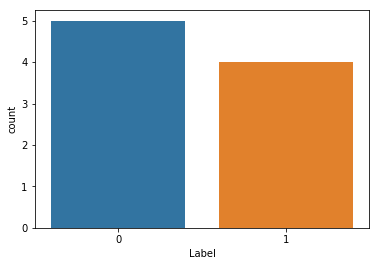

In [10]:
# Check the share of the classes
print('Share of the classes:')
print(round(df['Label'].value_counts(normalize=True) * 100, 2))
countplot(x='Label', data=df)

## Split per Train/Test

In [11]:
# Create a data with all columns except Label
df_X = df.drop('Label', axis=1)

# Create a category_desc labels dataset
df_y = pd.DataFrame(df['Label'])

# Use stratified sampling to split up the dataset according to the df_y dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify=df_y)

# Print out the Label counts on the training y labels
print(round(y_train['Label'].value_counts(normalize=True) * 100, 2))

1    50.0
0    50.0
Name: Label, dtype: float64


In [12]:
def check_score(X_, y_):
    '''
    Write a pattern to extract numbers and decimals
    Parameters:
        :params X_: input dataset
        :params y_: labels
    Returns:
        :returns: knn score
    '''

    # Split X and the y labels into training and test sets
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_)

    lgr = LogisticRegression()
    # Fit lgr to the training data
    lgr.fit(X_train_, y_train_)

    # Score knn on the test data and print it out
    return (lgr.score(X_test_, y_test_))

## Missing Data

In [13]:
# Number of missing values per column
print('Number of missing values per column:')
df.isnull().sum()

Number of missing values per column:


Date      0
Brand     3
Price1    1
Price2    1
Engine    0
Color     1
Year      0
Label     0
dtype: int64

In [14]:
# Number of not missing values per column
print('Number of NOT missing values per column:')
df.notnull().sum()

Number of NOT missing values per column:


Date      9
Brand     6
Price1    8
Price2    8
Engine    9
Color     8
Year      9
Label     9
dtype: int64

In [15]:
# Delete all rows with missing
print('Number of rows:', df.shape[0])
print('Number of rows after deleting all rows with missing:',
      df.dropna().shape[0])
df.dropna()

Number of rows: 9
Number of rows after deleting all rows with missing: 5


,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1
8,14.10.2018,Audi A4,21000.0,10000000.0,45.0 horsepower,red,2005,1


In [16]:
# Subset dataset without missing
df_no_missing = df[df.notnull()]
df_no_missing

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
1,14.10.2018,NaN,25000.0,21000.0,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,NaN,NaN,100.5 horsepower,red,2011,0
4,06.12.2018,NaN,35000.0,35000.0,50.0 horsepower,NaN,2019,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
6,07.01.2019,NaN,1000.0,1200.0,50.5 horsepower,red,1999,1
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1
8,14.10.2018,Audi A4,21000.0,10000000.0,45.0 horsepower,red,2005,1


In [17]:
# Delete all cols with missing
print('Number of crows:', df.shape[1])
print('Number of cows after deleting all cows with missing:',
      df.dropna(axis=1).shape[1])
df.dropna(axis=1)

Number of crows: 8
Number of cows after deleting all cows with missing: 4


,Date,Engine,Year,Label
0,10.10.2018,150.0 horsepower,2000,1
1,14.10.2018,100.0 horsepower,2010,0
2,07.11.2018,250.0 horsepower,2015,0
3,20.11.2018,100.5 horsepower,2011,0
4,06.12.2018,50.0 horsepower,2019,0
5,01.01.2019,40.0 horsepower,2005,0
6,07.01.2019,50.5 horsepower,1999,1
7,07.02.2019,45.0 horsepower,1995,1
8,14.10.2018,45.0 horsepower,2005,1


In [18]:
# Columns with at least 5 not missing
df.dropna(axis=1, thresh=5)

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
1,14.10.2018,NaN,25000.0,21000.0,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,NaN,NaN,100.5 horsepower,red,2011,0
4,06.12.2018,NaN,35000.0,35000.0,50.0 horsepower,NaN,2019,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
6,07.01.2019,NaN,1000.0,1200.0,50.5 horsepower,red,1999,1
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1
8,14.10.2018,Audi A4,21000.0,10000000.0,45.0 horsepower,red,2005,1


In [19]:
# Fill in missing values
df['Brand'].fillna('missing', inplace=True)
df['Color'].fillna('missing', inplace=True)

df['Price1'].fillna(df['Price1'].mean(), inplace=True)
df['Price2'].fillna(df['Price2'].mean(), inplace=True)

df

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
1,14.10.2018,missing,25000.0,21000.0,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,18437.5,1264662.5,100.5 horsepower,red,2011,0
4,06.12.2018,missing,35000.0,35000.0,50.0 horsepower,missing,2019,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
6,07.01.2019,missing,1000.0,1200.0,50.5 horsepower,red,1999,1
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1
8,14.10.2018,Audi A4,21000.0,10000000.0,45.0 horsepower,red,2005,1


## Data types

In [20]:
# Check Data Types
df.dtypes

Date       object
Brand      object
Price1    float64
Price2    float64
Engine     object
Color      object
Year        int64
Label       int64
dtype: object

In [21]:
# Reduce memory usage
if df['Price1'].min() > np.finfo(
        np.float32).min and df['Price1'].max() < np.finfo(np.float32).max:
    df['Price1'] = df['Price1'].astype(np.float32)

if df['Price2'].min() > np.finfo(
        np.float32).min and df['Price2'].max() < np.finfo(np.float32).max:
    df['Price2'] = df['Price2'].astype(np.float32)

if df['Year'].min() > np.iinfo(np.int32).min and df['Year'].max() < np.iinfo(
        np.int32).max:
    df['Year'] = df['Year'].astype(np.int32)

# Check Data Types
df.dtypes

Date       object
Brand      object
Price1    float32
Price2    float32
Engine     object
Color      object
Year        int32
Label       int64
dtype: object

## Standartization

### Log normalization

_Example of using: Column with hight varience_

In [22]:
df.var()

Price1    1.265898e+08
Price2    1.090100e+13
Year      6.202778e+01
Label     2.777778e-01
dtype: float64

In [23]:
df['log_Year'] = np.log(df['Year'])
df['log_Year'].var()

1.5400001231234405e-05

### Scaling data 

In [24]:
# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale
df_subset = df[['Price1', 'Price2', 'Year']]

# Apply the scaler to the DataFrame subset
df_subset_scaled = ss.fit_transform(df_subset)

df_subset_scaled

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype float32, int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype float32, int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.33583944, -0.3988841 , -0.88286165],
       [ 0.61865161, -0.3995266 ,  0.46387646],
       [ 0.80719305, -0.3982416 ,  1.13724552],
       [ 0.        ,  0.        ,  0.59855027],
       [ 1.56135882, -0.3950291 ,  1.67594076],
       [-0.3240556 , -0.4027391 , -0.20949259],
       [-1.6438457 , -0.40588735, -1.01753546],
       [-1.59671034, -0.40591947, -1.55623071],
       [ 0.24156872,  2.8062273 , -0.20949259]])

### Power Transformer

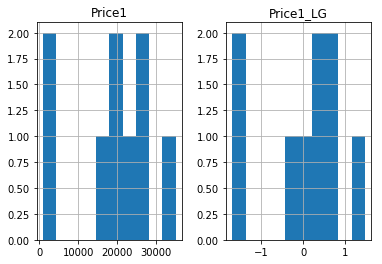

In [25]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df[['Price1']])

# Apply the power transform to the data
df['Price1_LG'] = pow_trans.transform(df[['Price1']])

# Plot the data before and after the transformation
df[['Price1', 'Price1_LG']].hist()
plt.show()

## Outliers

In [26]:
df['Price2'].describe()

count           9.0
mean      1264662.5
std       3301666.0
min          1100.0
25%         11000.0
50%         23000.0
75%         35000.0
max      10000000.0
Name: Price2, dtype: float64

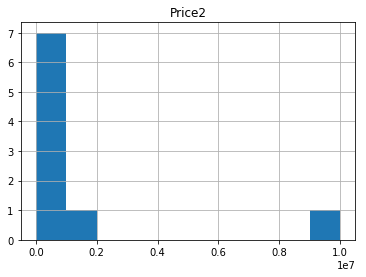

<Figure size 432x288 with 0 Axes>

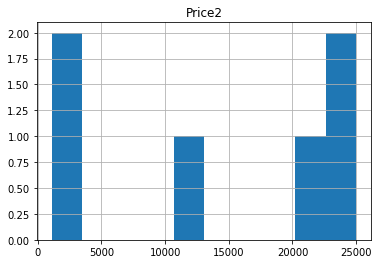

In [27]:
# Find the 95th quantile
quantile = df['Price2'].quantile(0.75)

# Trim the outliers
trimmed_df = df[df['Price2'] < quantile]

# The original histogram
df[['Price2']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['Price2']].hist()
plt.show()

In [28]:
trimmed_df['Price2'].describe()

count        6.000000
mean     13716.666992
std      10860.647461
min       1100.000000
25%       3650.000000
50%      16000.000000
75%      22500.000000
max      25000.000000
Name: Price2, dtype: float64

-5338669.5 7867994.5


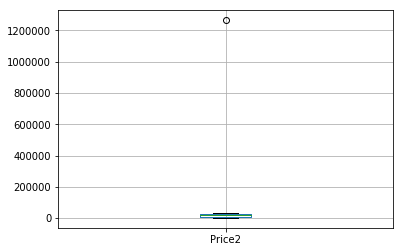

In [29]:
# Find the mean and standard dev
std = df['Price2'].std()
mean = df['Price2'].mean()

# Calculate the cutoff
cut_off = std * 2
lower, upper = mean - cut_off, mean + cut_off
print(lower, upper)
# Trim the outliers
trimmed_df = df[(df['Price2'] < upper) & (df['Price2'] > lower)]

# The trimmed box plot
trimmed_df[['Price2']].boxplot()
plt.show()

## Text

### Replace; Case

In [30]:
df['Engine'].head()

0    150.0 horsepower
1    100.0 horsepower
2    250.0 horsepower
3    100.5 horsepower
4     50.0 horsepower
Name: Engine, dtype: object

In [31]:
# Replace all non letter characters with a whitespace
df['Engine_clean'] = df['Engine'].replace('[^a-zA-Z]', ' ')
df['Engine_clean'] = df['Engine'].replace('[0-9]', ' ')

# Change to lower case
df['Engine_clean'] = df['Engine_clean'].str.lower()

# Print the first 5 rows of the clean column
print(df['Engine_clean'].head())

0    150.0 horsepower
1    100.0 horsepower
2    250.0 horsepower
3    100.5 horsepower
4     50.0 horsepower
Name: Engine_clean, dtype: object


### Pattern

In [32]:
def return_hp(str):
    '''
    Write a pattern to extract numbers and decimals
    Parameters:
        :params str: input string
    '''
    pattern = re.compile(r'\d+\.\d+')

    # Search the text for matches
    hp = re.match(pattern, str)

    # If a value is returned, use group(0) to return the found value
    if hp is not None:
        return float(hp.group(0))


# Apply the function to the Length column and take a look at both columns
df['Engine_hp'] = df['Engine'].apply(lambda row: return_hp(row))
df[['Engine', 'Engine_hp']]

,Engine,Engine_hp
0,150.0 horsepower,150.0
1,100.0 horsepower,100.0
2,250.0 horsepower,250.0
3,100.5 horsepower,100.5
4,50.0 horsepower,50.0
5,40.0 horsepower,40.0
6,50.5 horsepower,50.5
7,45.0 horsepower,45.0
8,45.0 horsepower,45.0


### Avg world

In [33]:
# Find the length of each text
df['char_cnt'] = df['Engine_clean'].str.len()

# Count the number of words in each text
df['word_cnt'] = df['Engine_clean'].str.split().str.len()
df['char_cnt'], df['word_cnt']
# Find the average length of word
df['avg_word_length'] = df['char_cnt'] / df['word_cnt']

# Print the first 5 rows of these columns
print(df[['Engine_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

       Engine_clean  char_cnt  word_cnt  avg_word_length
0  150.0 horsepower        16         2              8.0
1  100.0 horsepower        16         2              8.0
2  250.0 horsepower        16         2              8.0
3  100.5 horsepower        16         2              8.0
4   50.0 horsepower        15         2              7.5
5   40.0 horsepower        15         2              7.5
6   50.5 horsepower        15         2              7.5
7   45.0 horsepower        15         2              7.5
8   45.0 horsepower        15         2              7.5


### CountVectorizer

In [34]:
# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(df['Engine_clean'])

# Print feature names
print('All worlds:')
print(cv.get_feature_names())

# Apply the vectorizer
cv_transformed = cv.transform(df['Engine_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print('Binarized worlds:')
print(cv_array)

# Print the shape of cv_array
print('Array shape:')
print(cv_array.shape)

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(df['Engine_clean'])
print('Limited worlds:')
print(cv.get_feature_names())
cv_array = cv_transformed.toarray()

# Print the array shape
print('Limited array shape:')
print(cv_array.shape)

All worlds:
['100', '150', '250', '40', '45', '50', 'horsepower']
Binarized worlds:
[[0 1 0 0 0 0 1]
 [1 0 0 0 0 0 1]
 [0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 0 1]]
Array shape:
(9, 7)
Limited worlds:
['100', '45', '50']
Limited array shape:
(9, 3)


In [35]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(
    cv_array, columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
df_text = pd.concat([df['Engine'], cv_df], axis=1, sort=False)
print(df_text.head())

             Engine  Counts_100  Counts_45  Counts_50
0  150.0 horsepower           0          0          0
1  100.0 horsepower           1          0          0
2  250.0 horsepower           0          0          0
3  100.5 horsepower           1          0          0
4   50.0 horsepower           0          0          1


In [36]:
# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(
    max_features=100, stop_words='english', ngram_range=(2, 2))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df['Engine_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['100 horsepower', '150 horsepower', '250 horsepower', '40 horsepower', '45 horsepower', '50 horsepower']


### TfidfVectorizer

In [37]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(df['Engine_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(
    tv_transformed.toarray(),
    columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_100  TFIDF_150  TFIDF_250  TFIDF_40  TFIDF_45  TFIDF_50  \
0   0.000000    0.93378    0.00000       0.0       0.0  0.000000   
1   0.910647    0.00000    0.00000       0.0       0.0  0.000000   
2   0.000000    0.00000    0.93378       0.0       0.0  0.000000   
3   0.910647    0.00000    0.00000       0.0       0.0  0.000000   
4   0.000000    0.00000    0.00000       0.0       0.0  0.910647   

   TFIDF_horsepower  
0          0.357847  
1          0.413184  
2          0.357847  
3          0.413184  
4          0.413184  


In [38]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_150           0.933780
TFIDF_horsepower    0.357847
TFIDF_50            0.000000
TFIDF_45            0.000000
TFIDF_40            0.000000
Name: 0, dtype: float64


In [39]:
# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(
    max_features=100, stop_words='english', ngram_range=(2, 2))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(df['Engine_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['100 horsepower', '150 horsepower', '250 horsepower', '40 horsepower', '45 horsepower', '50 horsepower']


In [40]:
# Finding the most common words
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(
    cv_trigram.toarray(),
    columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_50 horsepower     2
Counts_45 horsepower     2
Counts_100 horsepower    2
Counts_40 horsepower     1
Counts_250 horsepower    1
dtype: int64


### Text vector

In [41]:
# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
df['Brand_text_tfidf'] = tfidf_vec.fit_transform(df['Brand'])

df[['Brand', 'Brand_text_tfidf']]

,Brand,Brand_text_tfidf
0,Honda Civic,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
1,missing,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
2,Toyota Corolla,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
3,Ford Focus,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
4,missing,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
5,Audi A4,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
6,missing,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
7,Honda,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."
8,Audi A4,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639..."


## Feature engineering 

In [42]:
# Removing features without variance as a noise
print(df.word_cnt.value_counts())
df.describe()


2    9
Name: word_cnt, dtype: int64


,Price1,Price2,Year,Label,log_Year,Price1_LG,Engine_hp,char_cnt,word_cnt,avg_word_length
count,9.00000,9.0,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.0,9.000000
mean,18437.50000,1264662.5,2006.555556,0.444444,7.604168,1.233581e-16,92.333333,15.444444,2.0,7.722222
std,11251.21582,3301666.0,7.875772,0.527046,0.003924,1.060660e+00,69.885174,0.527046,0.0,0.263523
min,1000.00000,1100.0,1995.000000,0.000000,7.598399,-1.693230e+00,40.000000,15.000000,2.0,7.500000
25%,15000.00000,11000.0,2000.000000,0.000000,7.600902,-2.630930e-01,45.000000,15.000000,2.0,7.500000
50%,21000.00000,23000.0,2005.000000,0.000000,7.603399,2.771196e-01,50.500000,15.000000,2.0,7.500000
75%,25000.00000,35000.0,2011.000000,1.000000,7.606387,6.262424e-01,100.500000,16.000000,2.0,8.000000
max,35000.00000,10000000.0,2019.000000,1.000000,7.610358,1.470982e+00,250.000000,16.000000,2.0,8.000000


### Categorical

#### Label Encoder

In [43]:
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the Color column
df['Color_enc'] = enc.fit_transform(df['Color'])

# Compare the two columns
print(df[['Color', 'Color_enc']].head())

     Color  Color_enc
0      red          3
1     blue          0
2    green          1
3      red          3
4  missing          2


#### One Hot Encoder

In [44]:
# Transform the Color column and concatinate with DataSet
df = pd.concat([df, pd.get_dummies(df['Color'])], axis=1)

df[['Color', 'blue', 'green', 'missing', 'red', 'yellow']]

,Color,blue,green,missing,red,yellow
0,red,0,0,0,1,0
1,blue,1,0,0,0,0
2,green,0,1,0,0,0
3,red,0,0,0,1,0
4,missing,0,0,1,0,0
5,blue,1,0,0,0,0
6,red,0,0,0,1,0
7,yellow,0,0,0,0,1
8,red,0,0,0,1,0


#### Rare categories

In [45]:
# Create a series out of the Color column
colors = df['Color']

# Get the counts of each category
color_counts = colors.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = colors.isin(color_counts[color_counts < 2].index)

# Label all other categories as Rare
colors[mask] = 'Rare'

# Print the updated category counts
print(pd.value_counts(colors))

red     4
Rare    3
blue    2
Name: Color, dtype: int64


### Numerical

#### Average

In [46]:
# Create a list of the columns to average
price_columns = ['Price1', 'Price2']

# Use apply to create a mean column
df['Price_average'] = df.apply(lambda row: row[price_columns].mean(), axis=1)
df['Price_average_log'] = np.log(df['Price_average'])

# Take a look at the results
print(df[['Price1', 'Price2', 'Price_average', 'Price_average_log']])

    Price1      Price2  Price_average  Price_average_log
0  22000.0     23000.0        22500.0          10.021271
1  25000.0     21000.0        23000.0          10.043249
2  27000.0     25000.0        26000.0          10.165852
3  18437.5   1264662.5       641550.0          13.371642
4  35000.0     35000.0        35000.0          10.463103
5  15000.0     11000.0        13000.0           9.472705
6   1000.0      1200.0         1100.0           7.003065
7   1500.0      1100.0         1300.0           7.170120
8  21000.0  10000000.0      5010500.0          15.427046


#### Datetime

In [47]:
# First, convert string column to date column
df['Date_converted'] = pd.to_datetime(df['Date'])

# Extract just the month and year from the converted column
df['Date_month'] = df.apply(lambda row: row['Date_converted'].month, axis=1)
df['Date_year'] = df.apply(lambda row: row['Date_converted'].year, axis=1)

# Take a look at the converted and new month columns
print(df[['Date_converted', 'Date_month', 'Date_year']])

  Date_converted  Date_month  Date_year
0     2018-10-10          10       2018
1     2018-10-14          10       2018
2     2018-07-11           7       2018
3     2018-11-20          11       2018
4     2018-06-12           6       2018
5     2019-01-01           1       2019
6     2019-07-01           7       2019
7     2019-07-02           7       2019
8     2018-10-14          10       2018


#### Categorizing

In [48]:
df['Price_Categorizing'] = 'low'
df.loc[(df['Price1'] > 10000), 'Price_Categorizing'] = 'higth'
df[['Price1', 'Price_Categorizing']]

,Price1,Price_Categorizing
0,22000.0,higth
1,25000.0,higth
2,27000.0,higth
3,18437.5,higth
4,35000.0,higth
5,15000.0,higth
6,1000.0,low
7,1500.0,low
8,21000.0,higth


#### Binarizing

In [49]:
df['Price_Binarizing'] = 0
df.loc[(df['Price1'] > 10000), 'Price_Binarizing'] = 1
df[['Price1', 'Price_Binarizing']]

,Price1,Price_Binarizing
0,22000.0,1
1,25000.0,1
2,27000.0,1
3,18437.5,1
4,35000.0,1
5,15000.0,1
6,1000.0,0
7,1500.0,0
8,21000.0,1


#### Binning

In [50]:
# Bin the continuous variable Price1 into 5 bins
df['Price_Binning'] = pd.cut(df['Price1'], 5)
df[['Price1', 'Price_Binning']]

,Price1,Price_Binning
0,22000.0,"(21400.0, 28200.0]"
1,25000.0,"(21400.0, 28200.0]"
2,27000.0,"(21400.0, 28200.0]"
3,18437.5,"(14600.0, 21400.0]"
4,35000.0,"(28200.0, 35000.0]"
5,15000.0,"(14600.0, 21400.0]"
6,1000.0,"(966.0, 7800.0]"
7,1500.0,"(966.0, 7800.0]"
8,21000.0,"(14600.0, 21400.0]"


In [51]:
# Specify the boundaries of the bins
bins = [-np.inf, 7800, 14600, 21400, 28200, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable Price1 using these boundaries
df['Price_Binning2'] = pd.cut(df['Price1'], bins=bins, labels=labels)

df[['Price1', 'Price_Binning', 'Price_Binning2']]

,Price1,Price_Binning,Price_Binning2
0,22000.0,"(21400.0, 28200.0]",High
1,25000.0,"(21400.0, 28200.0]",High
2,27000.0,"(21400.0, 28200.0]",High
3,18437.5,"(14600.0, 21400.0]",Medium
4,35000.0,"(28200.0, 35000.0]",Very high
5,15000.0,"(14600.0, 21400.0]",Medium
6,1000.0,"(966.0, 7800.0]",Very low
7,1500.0,"(966.0, 7800.0]",Very low
8,21000.0,"(14600.0, 21400.0]",Medium


## Removing redundant features
__remove noisy/correlated/duplicated features__

### Redundant columns

In [52]:
# Create a list of redundant column names to drop
to_drop = [
    'Brand', 'Price1', 'Price2', 'Price_average', 'Engine', 'Color', 'Year',
    'Date', 'Date_converted'
]

# Drop those columns from the dataset
df_subset_1 = df.drop(to_drop, axis=1)

# Print out the head of the new dataset
df_subset_1.head()

,Label,log_Year,Price1_LG,Engine_clean,Engine_hp,char_cnt,word_cnt,avg_word_length,Brand_text_tfidf,Color_enc,...,missing,red,yellow,Price_average_log,Date_month,Date_year,Price_Categorizing,Price_Binarizing,Price_Binning,Price_Binning2
0,1,7.600902,0.365124,150.0 horsepower,150.0,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",3,...,0,1,0,10.021271,10,2018,higth,1,"(21400.0, 28200.0]",High
1,0,7.605890,0.626242,100.0 horsepower,100.0,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",0,...,0,0,0,10.043249,10,2018,higth,1,"(21400.0, 28200.0]",High
2,0,7.608374,0.798128,250.0 horsepower,250.0,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",1,...,0,0,0,10.165852,7,2018,higth,1,"(21400.0, 28200.0]",High
3,0,7.606387,0.049142,100.5 horsepower,100.5,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",3,...,0,1,0,13.371642,11,2018,higth,1,"(14600.0, 21400.0]",Medium
4,0,7.610358,1.470982,50.0 horsepower,50.0,15,2,7.5,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",2,...,1,0,0,10.463103,6,2018,higth,1,"(28200.0, 35000.0]",Very high


### Correlated columns

In [53]:
# Print out the column correlations of the dataset
df_subset_1.corr()

,Label,log_Year,Price1_LG,Engine_hp,char_cnt,word_cnt,avg_word_length,Color_enc,blue,green,missing,red,yellow,Price_average_log,Date_month,Date_year,Price_Binarizing
Label,1.000000,-0.820046,-0.599580,-0.267538,-0.350000,NaN,-0.350000,0.743613,-0.478091,-0.316228,-0.316228,0.550000,0.395285,-0.157223,0.256495,0.316228,-0.597614
log_Year,-0.820046,1.000000,0.847720,0.342480,0.295064,NaN,0.295064,-0.509286,0.068861,0.401963,0.591470,-0.337273,-0.551251,0.415550,0.003753,-0.656368,0.688724
Price1_LG,-0.599580,0.847720,1.000000,0.402166,0.411132,NaN,0.411132,-0.469396,0.097056,0.282181,0.520071,-0.224019,-0.576439,0.543915,0.157135,-0.845402,0.888281
Engine_hp,-0.267538,0.342480,0.402166,1.000000,0.784515,NaN,0.784515,-0.229382,-0.181180,0.846031,-0.227158,-0.079187,-0.253988,0.043914,0.257079,-0.506187,0.361684
char_cnt,-0.350000,0.295064,0.411132,0.784515,1.000000,NaN,1.000000,-0.235780,0.059761,0.395285,-0.316228,0.100000,-0.316228,0.195716,0.564288,-0.632456,0.478091
word_cnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_word_length,-0.350000,0.295064,0.411132,0.784515,1.000000,NaN,1.000000,-0.235780,0.059761,0.395285,-0.316228,0.100000,-0.316228,0.195716,0.564288,-0.632456,0.478091
Color_enc,0.743613,-0.509286,-0.469396,-0.229382,-0.235780,NaN,-0.235780,1.000000,-0.823754,-0.286770,-0.028677,0.580381,0.487508,0.019839,0.427986,0.114708,-0.541944
blue,-0.478091,0.068861,0.097056,-0.181180,0.059761,NaN,0.059761,-0.823754,1.000000,-0.188982,-0.188982,-0.478091,-0.188982,-0.125200,-0.398541,0.188982,0.285714
green,-0.316228,0.401963,0.282181,0.846031,0.395285,NaN,0.395285,-0.286770,-0.188982,1.000000,-0.125000,-0.316228,-0.125000,-0.025630,-0.081111,-0.250000,0.188982


In [54]:
# Take a minute to find the column where
# the correlation value is greater than 0.75 at least twice
to_drop = ['log_Year', 'Price_average_log']

# Drop that column from the DataFrame
df_subset_2 = df_subset_1.drop(to_drop, axis=1)

# Print out the column correlations of the current dataset
df_subset_2.corr()

,Label,Price1_LG,Engine_hp,char_cnt,word_cnt,avg_word_length,Color_enc,blue,green,missing,red,yellow,Date_month,Date_year,Price_Binarizing
Label,1.000000,-0.599580,-0.267538,-0.350000,NaN,-0.350000,0.743613,-0.478091,-0.316228,-0.316228,0.550000,0.395285,0.256495,0.316228,-0.597614
Price1_LG,-0.599580,1.000000,0.402166,0.411132,NaN,0.411132,-0.469396,0.097056,0.282181,0.520071,-0.224019,-0.576439,0.157135,-0.845402,0.888281
Engine_hp,-0.267538,0.402166,1.000000,0.784515,NaN,0.784515,-0.229382,-0.181180,0.846031,-0.227158,-0.079187,-0.253988,0.257079,-0.506187,0.361684
char_cnt,-0.350000,0.411132,0.784515,1.000000,NaN,1.000000,-0.235780,0.059761,0.395285,-0.316228,0.100000,-0.316228,0.564288,-0.632456,0.478091
word_cnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_word_length,-0.350000,0.411132,0.784515,1.000000,NaN,1.000000,-0.235780,0.059761,0.395285,-0.316228,0.100000,-0.316228,0.564288,-0.632456,0.478091
Color_enc,0.743613,-0.469396,-0.229382,-0.235780,NaN,-0.235780,1.000000,-0.823754,-0.286770,-0.028677,0.580381,0.487508,0.427986,0.114708,-0.541944
blue,-0.478091,0.097056,-0.181180,0.059761,NaN,0.059761,-0.823754,1.000000,-0.188982,-0.188982,-0.478091,-0.188982,-0.398541,0.188982,0.285714
green,-0.316228,0.282181,0.846031,0.395285,NaN,0.395285,-0.286770,-0.188982,1.000000,-0.125000,-0.316228,-0.125000,-0.081111,-0.250000,0.188982
missing,-0.316228,0.520071,-0.227158,-0.316228,NaN,-0.316228,-0.028677,-0.188982,-0.125000,1.000000,-0.316228,-0.125000,-0.202777,-0.250000,0.188982


In [55]:
df_subset_2

,Label,Price1_LG,Engine_clean,Engine_hp,char_cnt,word_cnt,avg_word_length,Brand_text_tfidf,Color_enc,blue,green,missing,red,yellow,Date_month,Date_year,Price_Categorizing,Price_Binarizing,Price_Binning,Price_Binning2
0,1,0.365124,150.0 horsepower,150.0,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",3,0,0,0,1,0,10,2018,higth,1,"(21400.0, 28200.0]",High
1,0,0.626242,100.0 horsepower,100.0,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",0,1,0,0,0,0,10,2018,higth,1,"(21400.0, 28200.0]",High
2,0,0.798128,250.0 horsepower,250.0,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",1,0,1,0,0,0,7,2018,higth,1,"(21400.0, 28200.0]",High
3,0,0.049142,100.5 horsepower,100.5,16,2,8.0,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",3,0,0,0,1,0,11,2018,higth,1,"(14600.0, 21400.0]",Medium
4,0,1.470982,50.0 horsepower,50.0,15,2,7.5,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",2,0,0,1,0,0,6,2018,higth,1,"(28200.0, 35000.0]",Very high
5,0,-0.263093,40.0 horsepower,40.0,15,2,7.5,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",0,1,0,0,0,0,1,2019,higth,1,"(14600.0, 21400.0]",Medium
6,1,-1.693230,50.5 horsepower,50.5,15,2,7.5,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",3,0,0,0,1,0,7,2019,low,0,"(966.0, 7800.0]",Very low
7,1,-1.630415,45.0 horsepower,45.0,15,2,7.5,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",4,0,0,0,0,1,7,2019,low,0,"(966.0, 7800.0]",Very low
8,1,0.277120,45.0 horsepower,45.0,15,2,7.5,"(0, 6)\t0.6452572857754033\n (0, 2)\t0.7639...",3,0,0,0,1,0,10,2018,higth,1,"(14600.0, 21400.0]",Medium


In [56]:
# Score on the test data and print it out
df_X = df_subset_2.drop([
    'Label', 'Brand_text_tfidf', 'Price_Categorizing', 'Price_Binarizing',
    'Price_Binning', 'Price_Binning2', 'Engine_clean'
],
                        axis=1)
check_score(df_X, df_subset_2['Label'])

0.3333333333333333

## Dimensionality reduction

### PCA

In [57]:
X = df.select_dtypes(include=['int', 'float']).drop('Label', axis=1)
y = pd.DataFrame(df['Label'])

[9.99999998e-01 1.68197689e-09 2.93429070e-12 1.31754188e-12
 3.41457925e-13 1.31036736e-13 7.07790177e-15 1.64439040e-16
 3.98581571e-34]


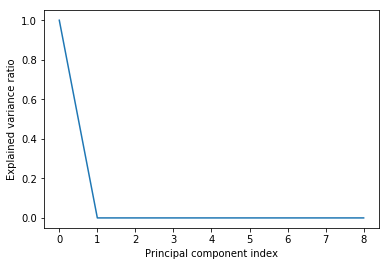

In [58]:
# sns.pairplot(X)
# plt.show()
# Create the PCA instance and fit and transform the data with pca
# PCA selecting 60% of the variance
# pca = PCA(n_components=0.6)
pca = PCA()
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(
    pc,
    #columns=[
    #    'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9'
    #]
)

# Create a pairplot of the principal component dataframe
# sns.pairplot(pc_df)
# plt.show()

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)
# print(pca.explained_variance_ratio_.cumsum())

plt.plot(pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

### T-SNE

In [59]:
# t-SNE is a great technique for visual exploration of high dimensional datasets.
df_num = df.select_dtypes(include=['int', 'float'])

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_num)

print(df_num.shape)
print(tsne_features.shape)

(9, 13)
(9, 2)


In [60]:
# Score on the test data and print it out
check_score(tsne_features, df['Label'])

0.3333333333333333

### RFE

In [61]:
X = df.select_dtypes(include=['int', 'float']).drop('Label', axis=1)
y = pd.DataFrame(df['Label'])

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [62]:
# Automatic Recursive Feature Elimination with
# LogisticRegression

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe_lr = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=0)

# Fits the eliminator to the data
rfe_lr.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_lr.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Print the features and their ranking (high = dropped early on)
# print(dict(zip(X.columns, rfe.ranking_)))

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe_lr.predict(X_test))
# print("{0:.1%} accuracy on test set.".format(acc))

# Assign the support array to gb_mask
lr_mask = rfe_lr.support_

# Print the features that are not eliminated
print('\nBest features:')
print(list(X.columns[lr_mask]))

print('\nWe can try to remove first features from the list:')
pd.DataFrame.from_dict(
    dict(zip(X.columns, rfe_lr.ranking_)), orient='index',
    columns=['rank']).sort_values(
        by='rank', ascending=False).head(3)

The model can explain 33.3% of the variance in the test set

Best features:
['char_cnt', 'avg_word_length', 'Price_average_log']

We can try to remove first features from the list:


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,rank
word_cnt,10
Date_month,9
Price_Binarizing,8


In [63]:
# Recursive Feature Elimination with random forests

# Set the feature eliminator to remove 2 features on each step
rfe_rf = RFE(
    estimator=RandomForestClassifier(),
    n_features_to_select=3,
    step=2,
    verbose=0)

# Fit the model to the training data
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Create a mask
rf_mask = rfe_rf.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, rf_mask]

# Print the features that are not eliminated
print('\nBest features:')
print(list(X.columns[rfe_rf.support_]))

print('\nWe can try to remove first features from the list:')
pd.DataFrame.from_dict(
    dict(zip(X.columns, rfe_rf.ranking_)), orient='index',
    columns=['rank']).sort_values(
        by='rank', ascending=False).head(3)

The model can explain 66.7% of the variance in the test set

Best features:
['log_Year', 'Color_enc', 'Date_month']

We can try to remove first features from the list:


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,rank
char_cnt,6
word_cnt,6
Price1_LG,5


In [64]:
# Automatic Recursive Feature Elimination with
# GradientBoostingRegressor

X = df.select_dtypes(include=['int', 'float']).drop('Label', axis=1)
y = pd.DataFrame(df['Label'])

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Select 5 features with RFE on a GradientBoostingRegressor, drop 2 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=5, step=2, verbose=0)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, gb_mask]

# Print the features that are not eliminated
print('\nBest features:')
print(list(X.columns[rfe_gb.support_]))

print('\nWe can try to remove first features from the list:')
pd.DataFrame.from_dict(
    dict(zip(X.columns, rfe_gb.ranking_)), orient='index',
    columns=['rank']).sort_values(
        by='rank', ascending=False).head(3)

The model can explain 97.1% of the variance in the test set

Best features:
['log_Year', 'Engine_hp', 'Color_enc', 'Price_average_log', 'Date_month']

We can try to remove first features from the list:


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,rank
Price1_LG,5
char_cnt,5
word_cnt,4


In [65]:
# Sum the votes of the three models
votes = np.sum([lr_mask, rf_mask, gb_mask], axis=0)
print(votes)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 2

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]
print('\nBest features:')
print(list(X_reduced.columns))

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=0)

lr = LogisticRegression()
scaler = StandardScaler()

lr.fit(scaler.fit_transform(X_train), y_train)
r_squared = lr.score(scaler.transform(X_test), y_test)
print(
    'The model can explain {0:.1%} of the variance in the test set using {1:} features.'
    .format(r_squared, len(lr.coef_)))

[2 0 1 1 0 1 2 0 2 2 0 0]

Best features:
['log_Year', 'Color_enc', 'Price_average_log', 'Date_month']
The model can explain 100.0% of the variance in the test set using 1 features.


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


### Removing

#### Features with low variance

In [66]:
df_num = df.select_dtypes(include=['int', 'float'])

# 0.001 is a good threshold to filter out low variance features
# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(df_num / df_num.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = df_num.loc[:, mask]

print(df_num.shape)
print(reduced_df.shape)

(9, 13)
(9, 10)


#### Features with missing values

In [67]:
df_num = df.select_dtypes(include=['int', 'float'])
# Create a boolean mask on whether each feature less than 50% missing values.
mask = df_num.isnull().sum() / len(df_num) < 0.2

# Apply the mask to create a reduced dataframe
reduced_df = df_num.loc[:, mask]
print(df_num.shape)
print(reduced_df.shape)

(9, 13)
(9, 13)


#### Highly correlated features

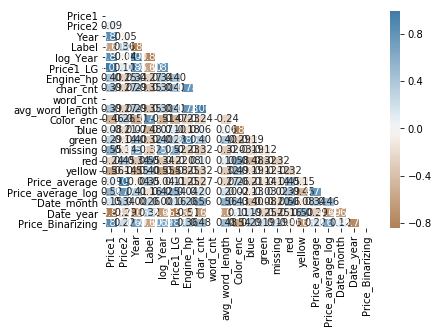

In [68]:
cmap = sns.diverging_palette(h_neg=40, h_pos=240, as_cmap=True)
# Create the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(
    corr, cmap=cmap, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [69]:
# print(df.corr())

# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]
print('Highly correlated features:', to_drop)

# Drop the features in the to_drop list
reduced_df = df.drop(to_drop, axis=1)

print(df.shape)
print(reduced_df.shape)

Highly correlated features: ['Price1', 'Price2', 'Year', 'char_cnt']
(9, 31)
(9, 27)


### Feature selection

#### Manual Recursive Feature Elimination

In [70]:
# Remove the feature with the lowest model coefficient

X = df.select_dtypes(include=['int', 'float']).drop('Label', axis=1)
y = pd.DataFrame(df['Label'])

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr = LogisticRegression()
scaler = StandardScaler()
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
# print("{0:.1%} accuracy on test set.".format(acc))

print('\nWe can try to remove first features from the list:')
pd.DataFrame.from_dict(
    dict(zip(X.columns,
             abs(lr.coef_[0]).round(2))),
    orient='index',
    columns=['accuracy']).sort_values(by='accuracy').head(3)


We can try to remove first features from the list:


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,accuracy
word_cnt,0.00
Date_year,0.07
Price_average_log,0.14


#### Random forest for feature selection

In [71]:
# Remove the feature with the lowest model coefficient
X = df.select_dtypes(include=['int', 'float']).drop('Label', axis=1)
y = pd.DataFrame(df['Label'])

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(rf.predict(X_test), y_test)

# Print the importances per feature
# print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
# print("{0:.1%} accuracy on test set.".format(acc))

# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print('\nBest features:')
print(reduced_X.columns)

print('\nWe can try to remove first features from the list:')
pd.DataFrame.from_dict(
    dict(zip(X.columns, rf.feature_importances_.round(2))), orient='index',
    columns=['feature_importances']).sort_values(
        by='feature_importances').head(3)


Best features:
Index(['log_Year', 'Price1_LG', 'Price_average_log'], dtype='object')

We can try to remove first features from the list:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


,feature_importances
word_cnt,0.0
Color_enc,0.0
Price_average,0.0


### Regularization

#### LASSO

In [72]:
X = df.select_dtypes(include=['int', 'float']).drop('Label', axis=1)
y = pd.DataFrame(df['Label'])

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso(alpha=0.1, random_state=0) # Alpha is hyperparameter

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(
    r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(
    n_ignored, len(la.coef_)))

The model can predict 97.4% of the variance in the test set.
The model has ignored 9 out of 12 features.


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [73]:
X = df.select_dtypes(include=['int', 'float']).drop('Label', axis=1)
y = pd.DataFrame(df['Label'])

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Create and fit the LassoCV model on the training set
lcv = LassoCV(random_state=0)
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 362045.833
The model explains -12.5% of the test set variance
1 features out of 12 selected


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
